# Health Insuramce ML Modelling

## Importing The Libraries

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

## Getting the data

In [3]:
! ls data

sample_submission.csv  test.csv  train.csv


In [4]:
df_raw = pd.read_csv('data/train.csv', index_col = ['id'])

## Peeking at the data

In [5]:
df_raw.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df_raw.shape

(381109, 11)

In [7]:
df_raw.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Observing the data

In [8]:
from pandas.plotting import scatter_matrix

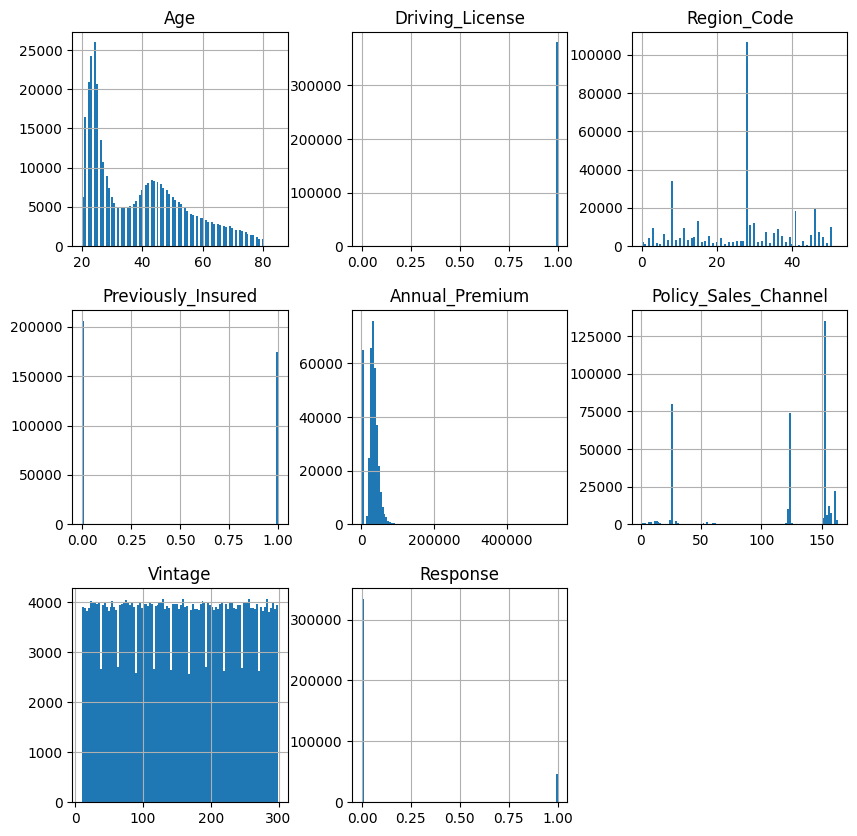

In [9]:
df_raw.hist(bins = 100, figsize = (10,10))
plt.show()

<Axes: xlabel='Vintage'>

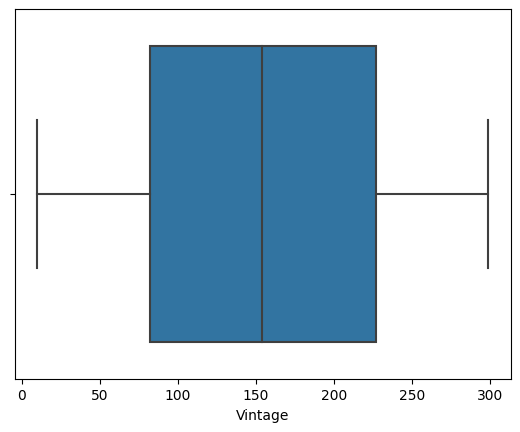

In [10]:
sns.boxplot(data = df_raw, x = 'Vintage')

In [11]:
df_raw['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

## Basic Feauture Engineering and Cleaning

In [12]:
df_raw = pd.get_dummies(df_raw, columns = ['Vehicle_Damage', 'Gender'])
df_raw.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_No,Vehicle_Damage_Yes,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
1,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,False,True,False,True
2,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,True,False,False,True
3,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,False,True,False,True
4,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,True,False,False,True
5,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,74,1,26.0,1,1-2 Year,30170.0,26.0,88,0,True,False,False,True
381106,30,1,37.0,1,< 1 Year,40016.0,152.0,131,0,True,False,False,True
381107,21,1,30.0,1,< 1 Year,35118.0,160.0,161,0,True,False,False,True


In [13]:
ordinal = OrdinalEncoder()
o_cols = ['Vehicle_Age']
df_raw[o_cols] = ordinal.fit_transform(df_raw[o_cols])
df_raw.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_No,Vehicle_Damage_Yes,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
1,44,1,28.0,0,2.0,40454.0,26.0,217,1,False,True,False,True
2,76,1,3.0,0,0.0,33536.0,26.0,183,0,True,False,False,True
3,47,1,28.0,0,2.0,38294.0,26.0,27,1,False,True,False,True
4,21,1,11.0,1,1.0,28619.0,152.0,203,0,True,False,False,True
5,29,1,41.0,1,1.0,27496.0,152.0,39,0,True,False,True,False


In [58]:
df_raw.corr()['Region_Code'].sort_values(ascending  = False)

Region_Code             1.000000
Age                     0.042574
Vehicle_Damage_Yes      0.028235
Response                0.010570
Gender_Male             0.000604
Gender_Female          -0.000604
Driving_License        -0.001081
Vintage                -0.002750
Annual_Premium         -0.010588
Previously_Insured     -0.024659
Vehicle_Age            -0.027840
Vehicle_Damage_No      -0.028235
Policy_Sales_Channel   -0.042420
Name: Region_Code, dtype: float64

## Getting data Ready for Modelling

In [55]:
X = df_raw.drop('Response', axis =1).copy()
y = df_raw['Response'].copy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304887, 12), (76222, 12), (304887,), (76222,))

In [17]:
logreg = LogisticRegression(max_iter = 200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [19]:
log_reg_pred = logreg.predict(X_test)
log_acc = accuracy_score(y_test, log_reg_pred)
log_precision = precision_score(y_test, log_reg_pred),
log_recall = recall_score(y_test, log_reg_pred)
log_matrix = confusion_matrix(y_test, log_reg_pred) 
log_acc, log_precision, log_recall

(0.8746687308126263, (0.265625,), 0.0017851517378977212)

Text(0.5, 1.0, 'Log Reg')

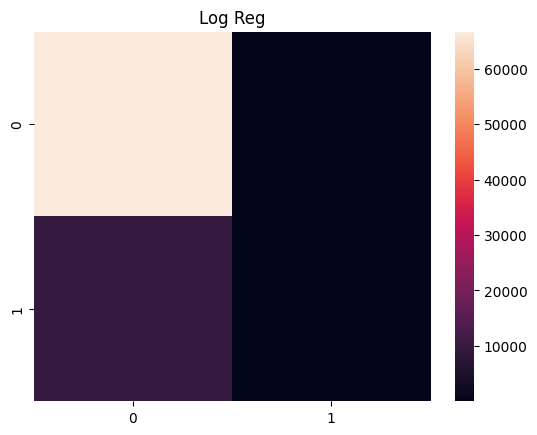

In [23]:
sns.heatmap(log_matrix)
plt.title('Log Reg')

In [24]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dtree_pred = dtree.predict(X_test)
d_tree_acc = accuracy_score(y_test, dtree_pred)
d_tree_precision = precision_score(y_test, dtree_pred),
d_tree_recall = recall_score(y_test, dtree_pred)
dtree_matrix = confusion_matrix(y_test, dtree_pred) 
d_tree_acc, d_tree_precision, d_tree_recall

(0.8211408779617433, (0.29412943297936284,), 0.30830620602751235)

Text(0.5, 1.0, 'Decision Tree')

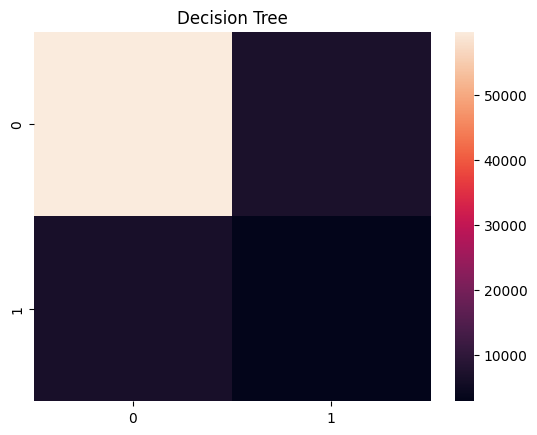

In [26]:
sns.heatmap(dtree_matrix)
plt.title('Decision Tree')

In [28]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(y_test, rforest_pred)
rforest_precision = precision_score(y_test, rforest_pred),
rforest_recall = recall_score(y_test, rforest_pred)
rforest_matrix = confusion_matrix(y_test, rforest_pred) 
rforest_acc, rforest_precision, rforest_recall

(0.8643698669675421, (0.3681656421869945,), 0.11950015751338863)

Text(0.5, 1.0, 'Random Forest')

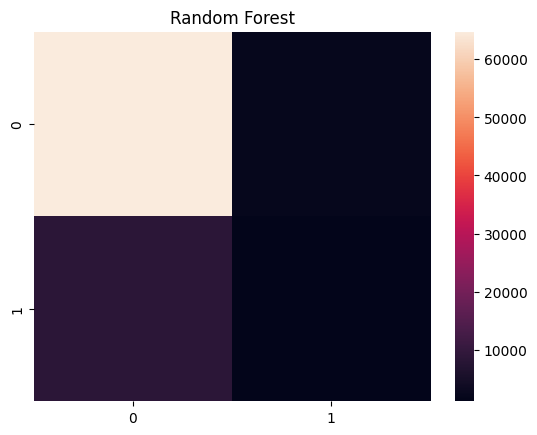

In [30]:
sns.heatmap(rforest_matrix)
plt.title('Random Forest')

In [34]:
sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [37]:
sgd_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, sgd_pred)
sgd_precision = precision_score(y_test, sgd_pred),
sgd_recall = recall_score(y_test, sgd_pred)
sgd_matrix = confusion_matrix(y_test, sgd_pred) 
sgd_acc, sgd_precision, sgd_recall

(0.8590564403977854, (0.1858908341915551,), 0.037908222198886905)

In [44]:
score_df = pd.DataFrame({'log': [log_acc, log_precision[0], log_recall],
                         'dtree': [d_tree_acc, d_tree_precision[0], d_tree_recall],
                         'rforest': [rforest_acc, rforest_precision[0], rforest_recall],
                         'sgd': [sgd_acc, sgd_precision[0], sgd_recall]
                        }, index = ['Acc', 'Precision', 'Recall'])

In [45]:
score_df.T

,Acc,Precision,Recall
log,0.874669,0.265625,0.001785
dtree,0.821141,0.294129,0.308306
rforest,0.864370,0.368166,0.119500
sgd,0.859056,0.185891,0.037908


<Axes: ylabel='Recall'>

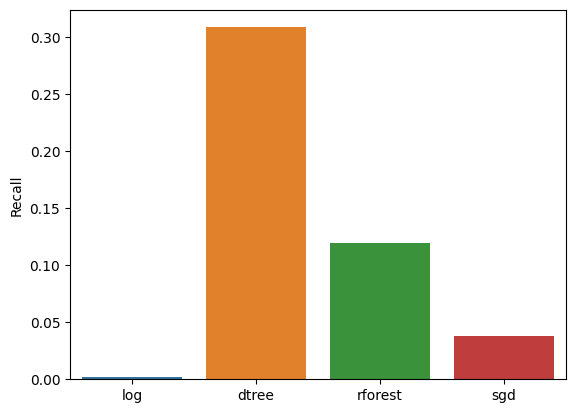

In [40]:
sns.barplot(data = score_df.T, x = score_df.T.index, y = 'Recall')

<Axes: ylabel='Precision'>

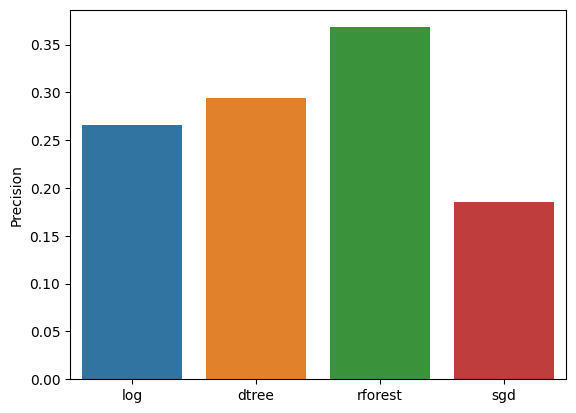

In [46]:
sns.barplot(data = score_df.T, x = score_df.T.index, y = 'Precision')

<Axes: xlabel='Response'>

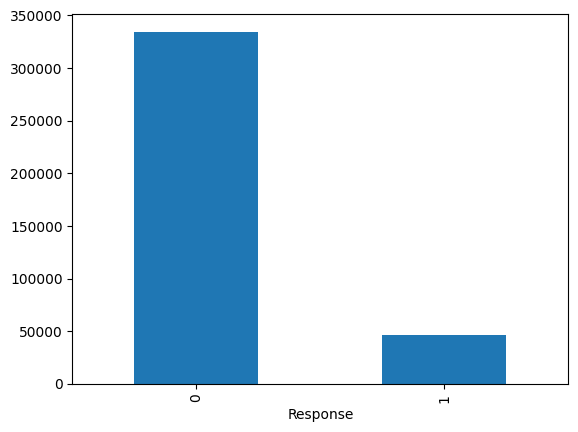

In [49]:
df_raw['Response'].value_counts().plot(kind = 'bar')

Response                1.000000
Vehicle_Damage_Yes      0.354400
Age                     0.111147
Gender_Male             0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender_Female          -0.052440
Vehicle_Age            -0.104078
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Vehicle_Damage_No      -0.354400
Name: Response, dtype: float64

In [53]:
df_raw.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'Gender_Female',
       'Gender_Male'],
      dtype='object')